In [51]:
import numpy
import scipy.special
import matplotlib.pyplot
%matplotlib inline

In [68]:
# nerual network class definition
class neuralNetwork:
    #initialise the neural network
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        self.lr = learningrate
        
        self.wih = numpy.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes))
        self.who = numpy.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes))
        
        self.activation_function = lambda x: scipy.special.expit(x)
        pass
    
    def train(self,inputs_list,targets_list):
        inputs = numpy.array(inputs_list,ndmin=2).T
        targets = numpy.array(targets_list,ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih,inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who,hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        # 计算误差
        output_errors =  targets - final_outputs
        
        hidden_errors = numpy.dot(self.who.T,output_errors)
        
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)),numpy.transpose(hidden_outputs))
        
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)),numpy.transpose(inputs))
        pass
    def query(self,inputs_list):
        inputs = numpy.array(inputs_list,ndmin=2).T
        hidden_inputs =numpy.dot(self.wih,inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who,hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs
        pass
    

In [69]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

learning_rate=0.1

n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

epochs = 7

for e in range(epochs):
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs,targets)
        pass
    pass




In [70]:
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [83]:
scorecard = []

for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
 #   print(correct_label,"correct label")
    inputs = (numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)
#   print(label,"network's answer")
    if(label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass
            
    

In [84]:
scorecard_array = numpy.asarray(scorecard)
print("performance = ",scorecard_array.sum() / scorecard_array.size)

performance =  0.9669


In [85]:
import imageio

import glob


In [86]:
our_own_dataset = []
for image_file_name in glob.glob('my_own_images/?.png'):
    print ("loading ... ", image_file_name)
    label = int(image_file_name[-5:-4])
    img_array = imageio.imread(image_file_name, as_gray=True)
    print(len(img_array))
    img_data  = 255.0 - img_array.reshape(784)
    img_data = (img_data / 255.0 * 0.99) + 0.01
    print(numpy.min(img_data))
    print(numpy.max(img_data))
    record = numpy.append(label,img_data)
#     print(record)
    our_own_dataset.append(record)
#     targets = numpy.zeros(output_nodes) + 0.01
#     targets[label] = 0.99
#     n.train(img_data,targets)
    pass

loading ...  my_own_images/8.png
28
0.01
0.86800003
loading ...  my_own_images/9.png
28
0.01
0.8718824
loading ...  my_own_images/4.png
28
0.01
0.96117646
loading ...  my_own_images/5.png
28
0.01
0.94564706
loading ...  my_own_images/7.png
28
0.01
0.8718824
loading ...  my_own_images/6.png
28
0.01
0.8602353
loading ...  my_own_images/2.png
28
0.01
0.8718824
loading ...  my_own_images/3.png
28
0.01
0.8718824
loading ...  my_own_images/1.png
28
0.01
0.8641177
loading ...  my_own_images/0.png
28
0.01
0.86800003


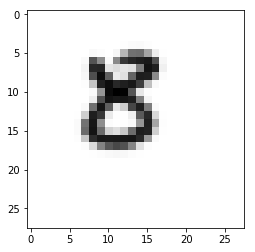

In [87]:
matplotlib.pyplot.imshow(our_own_dataset[0][1:].reshape(28,28), cmap='Greys', interpolation='None')

In [90]:
my_scorecard = []

for record in our_own_dataset:
    correct_label = int(record[0])
    print(correct_label,"正确的数字")
    inputs = record[1:]
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)
    print(label,"神经网络认为")
    if(label == correct_label):
        my_scorecard.append(1)
    else:
        my_scorecard.append(0)
        pass
    pass

my_scorecard_array = numpy.asarray(my_scorecard)
print("my_performance = ",my_scorecard_array.sum() / my_scorecard_array.size)

8 正确的数字
9 神经网络认为
9 正确的数字
9 神经网络认为
4 正确的数字
4 神经网络认为
5 正确的数字
5 神经网络认为
7 正确的数字
7 神经网络认为
6 正确的数字
6 神经网络认为
2 正确的数字
2 神经网络认为
3 正确的数字
3 神经网络认为
1 正确的数字
1 神经网络认为
0 正确的数字
0 神经网络认为
my_performance =  0.9


In [91]:
import imageio

import glob

import numpy
import matplotlib.pyplot
%matplotlib inline